In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pd.options.display.max_columns = None

In [3]:
destinations = pd.read_csv("destinations.csv")
sample_sub = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv", parse_dates=True)
test = pd.read_csv("test.csv", parse_dates=True)

In [4]:
destinations.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.043789,-2.181690,-2.181690,-2.181690,-2.165028,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.165028,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.181690,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.181690,-2.181690,-2.133508,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.181690,-2.181690,-2.148982,-2.181690,-2.181690,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,-2.224164,-2.209855,-2.224164,-2.110723,-2.186008,-2.224164,-2.124474,-2.224164,-2.156467,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.224164,-2.153316,-2.186008,-2.224164,-2.224164,-2.224164,-2.128237,-2.158309,

In [5]:
sample_sub.head()

,id,hotel_cluster
0,0,99 1
1,1,99 1
2,2,99 1
3,3,99 1
4,4,99 1


In [6]:
train.columns

Index([u'date_time', u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_ci', u'srch_co', u'srch_adults_cnt',
       u'srch_children_cnt', u'srch_rm_cnt', u'srch_destination_id',
       u'srch_destination_type_id', u'is_booking', u'cnt', u'hotel_continent',
       u'hotel_country', u'hotel_market', u'hotel_cluster'],
      dtype='object')

In [7]:
train = train.sample(frac=.08)
display (train.head())
cri = train['srch_ci'].str.contains('255', na=False)
train = train[~cri]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
15686884,2013-09-17 16:32:05,11,3,205,155,54231,980.8090,907161,0,1,9,2013-11-28,2013-12-01,1,0,1,8250,1,0,7,2,50,628,79
30571420,2013-10-31 21:30:51,2,3,66,442,28620,1158.9457,900675,0,0,4,2013-11-26,2013-11-27,1,1,1,26503,6,0,1,2,50,684,50
28676039,2013-10-28 13:46:36,23,1,1,146,27993,5518.2264,819525,0,1,1,2013-11-20,2013-11-29,1,0,1,21220,6,0,2,5,132,74,43
21226397,2014-03-16 06:57:58,34,3,205,354,55763,3758.5345,316268,0,0,9,2014-05-17,2014-05-21,2,0,1,8213,1,0,1,6,68,275,83
220168,2014-07-11 14:49:13,2,3,66,442,28620,1357.4279,813517,0,0,9,2014-07-30,2014-07-31,2,1,1,9145,1,0,2,2,50,364,55


In [8]:
pd.to_datetime(train['date_time'], format='%Y-%m-%d %H:%M:%S')
pd.to_datetime(train['srch_ci'], format='%Y-%m-%d')
pd.to_datetime(train['srch_co'], format='%Y-%m-%d')

15686884   2013-12-01
30571420   2013-11-27
28676039   2013-11-29
21226397   2014-05-21
220168     2014-07-31
13821601   2014-03-08
34691652   2013-08-14
17610019   2014-08-20
1024765    2014-10-04
37120006   2014-05-26
19472100   2014-07-19
27788824   2013-03-11
20285653   2014-10-17
7176627    2014-07-12
5462412    2013-10-31
1158848    2014-09-14
10985306   2013-12-28
9879844    2013-10-12
11761564   2013-09-27
5776080    2014-04-14
24104172   2014-03-09
31203725   2013-09-04
21168402   2014-11-06
19351247   2014-07-01
4340527    2013-08-11
20486125   2014-08-31
18500737   2013-10-23
19047006   2014-04-06
33230073   2014-08-31
25554728   2014-09-22
              ...    
11381027   2014-09-17
37243276   2014-07-08
23750201   2014-12-15
17124752   2014-09-01
23128641   2014-08-24
31223363   2014-03-15
25403912   2014-08-31
11119261   2013-08-11
987303     2013-07-23
35579205   2014-11-17
20282946   2014-03-13
440610     2014-10-09
13021185   2014-07-27
28627082   2013-07-04
18044676  

In [9]:
train.describe()

/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,1.931491e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06,3.013623e+06
mean,9.783274e+00,2.681363e+00,8.610865e+01,3.082526e+02,2.774356e+04,1.968629e+03,6.046883e+05,1.347448e-01,2.483327e-01,5.873185e+00,2.025132e+00,3.322911e-01,1.112624e+00,1.443742e+04,2.582837e+00,7.974256e-02,1.483774e+00,3.154380e+00,8.121245e+01,6.003128e+02,4.982385e+01
std,1.196280e+01,7.471975e-01,5.923174e+01,2.083316e+02,1.677613e+04,2.233614e+03,3.506319e+05,3.414508e-01,4.320458e-01,3.716765e+00,9.128215e-01,7.313280e-01,4.575109e-01,1.105917e+04,2.153262e+00,2.708943e-01,1.217113e+00,1.622553e+00,5.612165e+01,5.114932e+02,2.892952e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,6.600000e+01,1.740000e+02,1.297600e+04,NaN,2.990550e+05,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,8.267000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,1.620000e+02,2.500000e+01
50%,2.000000e+00,3.000000e+00,6.600000e+01,3.140000e+02,2.765500e+04,NaN,6.045420e+05,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,9.147000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01,5.930000e+02,4.900000e+01
75%,1.400000e+01,3.000000e+00,7.000000e+01,3.850000e+02,4.238600e+04,NaN,9.104190e+05,0.000000e+00,0.000000e+00,9.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.879000e+04,5.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.060000e+02,7.010000e+02,7.300000e+01
max,5.300000e+01,4.000000e+00,2.390000e+02,1.027000e+03,5.650700e+04,1.240790e+04,1.198784e+06,1.000000e+00,1.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,8.000000e+00,6.510400e+04,9.000000e+00,1.000000e+00,1.260000e+02,6.000000e+00,2.120000e+02,2.117000e+03,9.900000e+01


In [10]:
cnt_columns = [col for col in train.columns if 'cnt' in col]
train[cnt_columns]

,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cnt
15686884,1,0,1,7
30571420,1,1,1,1
28676039,1,0,1,2
21226397,2,0,1,1
220168,2,1,1,2
13821601,2,0,1,1
34691652,3,2,2,3
17610019,2,0,1,1
1024765,2,0,1,1
37120006,2,0,1,1


In [11]:
srch_cols = [col for col in train.columns if 'srch' in col]
train[srch_cols]

,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id
15686884,2013-11-28,2013-12-01,1,0,1,8250,1
30571420,2013-11-26,2013-11-27,1,1,1,26503,6
28676039,2013-11-20,2013-11-29,1,0,1,21220,6
21226397,2014-05-17,2014-05-21,2,0,1,8213,1
220168,2014-07-30,2014-07-31,2,1,1,9145,1
13821601,2014-03-06,2014-03-08,2,0,1,44483,1
34691652,2013-08-12,2013-08-14,3,2,2,33607,6
17610019,2014-08-15,2014-08-20,2,0,1,59819,6
1024765,2014-10-02,2014-10-04,2,0,1,8254,1
37120006,2014-05-23,2014-05-26,2,0,1,23682,6


In [12]:
hotel_cols = [col for col in train.columns if 'hotel' in col]
train[hotel_cols]

,hotel_continent,hotel_country,hotel_market,hotel_cluster
15686884,2,50,628,79
30571420,2,50,684,50
28676039,5,132,74,43
21226397,6,68,275,83
220168,2,50,364,55
13821601,2,198,791,50
34691652,3,82,229,57
17610019,3,5,1701,82
1024765,2,50,365,41
37120006,2,50,659,94


In [13]:
bool_col = [col for col in train.columns if 'is_' in col]
train[bool_col]

,is_mobile,is_package,is_booking
15686884,0,1,0
30571420,0,0,0
28676039,0,1,0
21226397,0,0,0
220168,0,0,0
13821601,0,0,0
34691652,0,0,0
17610019,0,0,0
1024765,0,0,0
37120006,0,0,0


In [14]:
'''box_plot = train.boxplot(figsize=(40,120))
plt.savefig("box_plot")

hist_plot = train.hist(figsize=(60,60))
plt.savefig("hist_plot")

sm = pd.scatter_matrix(train, diagonal='kde', figsize=(80,80))
plt.savefig('scatter_matrix')'''

'box_plot = train.boxplot(figsize=(40,120))\nplt.savefig("box_plot")\n\nhist_plot = train.hist(figsize=(60,60))\nplt.savefig("hist_plot")\n\nsm = pd.scatter_matrix(train, diagonal=\'kde\', figsize=(80,80))\nplt.savefig(\'scatter_matrix\')'

In [15]:
corr_df = train.corr()
display(corr_df)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,1.000000,-0.634919,0.166030,0.126858,-0.015463,0.031412,0.024279,-0.006933,0.052253,-0.030037,-0.010524,-0.032241,0.014279,0.029330,-0.010494,-0.009958,0.019970,0.203282,0.261011,-0.067066,-0.022629
posa_continent,-0.634919,1.000000,0.176151,-0.026994,0.038493,0.047470,-0.010737,0.016453,-0.094490,0.092612,0.009605,0.033667,-0.030064,-0.012021,0.042495,0.009093,-0.014484,-0.333950,-0.156418,0.051479,0.015216
user_location_country,0.166030,0.176151,1.000000,0.055269,0.123204,0.048197,-0.023691,0.004099,-0.025517,0.106409,0.037644,0.036664,0.000571,0.008971,0.031166,0.007932,0.003854,-0.067399,0.093727,0.019338,-0.010395
user_location_region,0.126858,-0.026994,0.055269,1.000000,0.130465,0.139714,-0.002449,0.016961,0.038035,0.001531,0.008524,0.012355,0.000461,0.023143,0.009981,0.007030,-0.009506,0.045648,-0.055251,0.045116,0.006979
user_location_city,-0.015463,0.038493,0.123204,0.130465,1.000000,0.013642,-0.008058,0.001843,0.013876,0.026846,0.009040,0.008270,0.000308,0.002272,0.000308,0.001642,-0.000765,0.006083,-0.008972,0.010098,0.001216
orig_destination_distance,0.031412,0.047470,0.048197,0.139714,0.013642,1.000000,0.016453,-0.054228,0.039192,0.003004,-0.023141,-0.060395,-0.006385,-0.027598,-0.039492,-0.038074,0.009252,0.414435,0.253860,-0.087489,0.007291
user_id,0.024279,-0.010737,-0.023691,-0.002449,-0.008058,0.016453,1.000000,-0.006196,-0.012389,-0.002092,-0.004779,0.000038,0.000601,0.002489,0.004404,0.001921,0.000040,0.002553,0.009536,-0.004421,0.000303
is_mobile,-0.006933,0.016453,0.004099,0.016961,0.001843,-0.054228,-0.006196,1.000000,0.054368,-0.032306,0.019797,0.020926,-0.022771,-0.007518,-0.017211,-0.031265,0.004827,-0.020463,-0.025260,0.007993,0.009176
is_package,0.052253,-0.094490,-0.025517,0.038035,0.013876,0.039192,-0.012389,0.054368,1.000000,-0.010723,-0.023575,-0.034224,-0.039039,-0.147511,-0.228274,-0.075713,0.127253,0.112113,-0.038248,-0.015129,0.039277
channel,-0.030037,0.092612,0.106409,0.001531,0.026846,0.003004,-0.002092,-0.032306,-0.010723,1.000000,-0.022942,0.006510,0.007096,0.001995,0.027488,0.024604,-0.012541,-0.022044,-0.002363,0.004458,0.001226


In [16]:
corr_df.to_csv("corr_df.csv")

In [17]:
corr_df_sig = corr_df[(corr_df>.4) & (corr_df<1)]
corr_df_sig.dropna(how='all', axis=1, inplace=True)
display(corr_df_sig)

,orig_destination_distance,srch_adults_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent
site_name,NaN,NaN,NaN,NaN,NaN,NaN
posa_continent,NaN,NaN,NaN,NaN,NaN,NaN
user_location_country,NaN,NaN,NaN,NaN,NaN,NaN
user_location_region,NaN,NaN,NaN,NaN,NaN,NaN
user_location_city,NaN,NaN,NaN,NaN,NaN,NaN
orig_destination_distance,NaN,NaN,NaN,NaN,NaN,0.414435
user_id,NaN,NaN,NaN,NaN,NaN,NaN
is_mobile,NaN,NaN,NaN,NaN,NaN,NaN
is_package,NaN,NaN,NaN,NaN,NaN,NaN
channel,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
sig_cols = corr_df_sig.columns
print sig_cols

Index([u'orig_destination_distance', u'srch_adults_cnt', u'srch_rm_cnt',
       u'srch_destination_id', u'srch_destination_type_id',
       u'hotel_continent'],
      dtype='object')


In [19]:
train[sig_cols]

,orig_destination_distance,srch_adults_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent
15686884,980.8090,1,1,8250,1,2
30571420,1158.9457,1,1,26503,6,2
28676039,5518.2264,1,1,21220,6,5
21226397,3758.5345,2,1,8213,1,6
220168,1357.4279,2,1,9145,1,2
13821601,80.3442,2,1,44483,1,2
34691652,8628.4044,3,2,33607,6,3
17610019,NaN,2,1,59819,6,3
1024765,7932.5770,2,1,8254,1,2
37120006,317.6244,2,1,23682,6,2


In [20]:
train['hotel_cluster']

15686884    79
30571420    50
28676039    43
21226397    83
220168      55
13821601    50
34691652    57
17610019    82
1024765     41
37120006    94
19472100    44
27788824    52
20285653    34
7176627      0
5462412     51
1158848     15
10985306    48
9879844     95
11761564    18
5776080     70
24104172    63
31203725    91
21168402    62
19351247     0
4340527     96
20486125    65
18500737    50
19047006    64
33230073    11
25554728    82
            ..
11381027    62
37243276     5
23750201    15
17124752    77
23128641    41
31223363    91
25403912    23
11119261    47
987303       7
35579205    97
20282946    91
440610       2
13021185    62
28627082    11
18044676    52
28009801     6
30525903    39
36814288     5
2003832     90
20360945    26
24438045    73
14328188    78
15715878    75
32489965    72
21470807    95
8750592     68
3222453     50
33719769    59
26853077    26
24530446    97
Name: hotel_cluster, dtype: int64

In [21]:
sig_train = pd.concat([train[sig_cols], train['hotel_cluster']], axis=1)
sig_train_n = sig_train.dropna()

In [22]:
display(sig_train_n)

,orig_destination_distance,srch_adults_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_cluster
15686884,980.8090,1,1,8250,1,2,79
30571420,1158.9457,1,1,26503,6,2,50
28676039,5518.2264,1,1,21220,6,5,43
21226397,3758.5345,2,1,8213,1,6,83
220168,1357.4279,2,1,9145,1,2,55
13821601,80.3442,2,1,44483,1,2,50
34691652,8628.4044,3,2,33607,6,3,57
1024765,7932.5770,2,1,8254,1,2,41
37120006,317.6244,2,1,23682,6,2,94
7176627,412.4692,2,1,8268,1,2,0


In [23]:
def linearRegressionAnalysis(x1_df, x2_df, y_df):

    y = np.matrix(y_df).transpose()
    x1 = np.matrix(x1_df).transpose()
    x2 = np.matrix(x2_df).transpose()
    x = np.column_stack([x1, x1])

    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    f = model.fit()
    return f.summary()

In [24]:
hotel_cont = sig_train_n['hotel_continent']
ori_d = sig_train_n['orig_destination_distance']
hotel_clus = sig_train_n['hotel_cluster']
linearRegressionAnalysis(hotel_cont, ori_d, hotel_clus)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.68
Date:                Sun, 29 May 2016   Prob (F-statistic):            0.00108
Time:                        23:51:59   Log-Likelihood:            -9.2554e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         49.7992      0.046   1090.365      0.000        49.710    49.889
x1             0.0229      0.007      3.268      0.001         0.009     0.037
x2             0.0229      0.007      3.268      0.001         0.009     0.037
==============================================================================
Omnibus:                  1239269.007   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108673.558
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                       1.838   Cond. No.                     1.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
rm_cont = sig_train_n['srch_rm_cnt']
adult_cont = sig_train_n['srch_adults_cnt']
hotel_clus = sig_train_n['hotel_cluster']

linearRegressionAnalysis(rm_cont, adult_cont, hotel_clus)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     67.98
Date:                Sun, 29 May 2016   Prob (F-statistic):           1.65e-16
Time:                        23:52:00   Log-Likelihood:            -9.2554e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         50.3723      0.057    877.493      0.000        50.260    50.485
x1            -0.1995      0.024     -8.245      0.000        -0.247    -0.152
x2            -0.1995      0.024     -8.245      0.000        -0.247    -0.152
==============================================================================
Omnibus:                  1243330.546   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108749.246
Skew:                           0.010   Prob(JB):                         0.00
Kurtosis:                       1.838   Cond. No.                     4.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
dest_type = sig_train_n['srch_destination_type_id']
dest = sig_train_n['srch_destination_id']
hotel_clus = sig_train_n['hotel_cluster']

linearRegressionAnalysis(dest_type, dest, hotel_clus)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2935.
Date:                Sun, 29 May 2016   Prob (F-statistic):               0.00
Time:                        23:52:01   Log-Likelihood:            -9.2540e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         51.3094      0.033   1556.762      0.000        51.245    51.374
x1            -0.2622      0.005    -54.174      0.000        -0.272    -0.253
x2            -0.2622      0.005    -54.174      0.000        -0.272    -0.253
==============================================================================
Omnibus:                  1170240.882   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107298.510
Skew:                           0.012   Prob(JB):                         0.00
Kurtosis:                       1.846   Cond. No.                     8.03e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
corr_df_sig1 = corr_df[(corr_df>.25) & (corr_df<1)]
corr_df_sig1.dropna(how='all', axis=1, inplace=True)
display(corr_df_sig1)

,site_name,orig_destination_distance,srch_adults_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country
site_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261011
posa_continent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location_country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location_region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location_city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orig_destination_distance,NaN,NaN,NaN,NaN,NaN,NaN,0.414435,0.253860
user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_package,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
sig_cols = corr_df_sig1.columns
print sig_cols

Index([u'site_name', u'orig_destination_distance', u'srch_adults_cnt',
       u'srch_rm_cnt', u'srch_destination_id', u'srch_destination_type_id',
       u'hotel_continent', u'hotel_country'],
      dtype='object')


In [29]:
sig_train = pd.concat([train[sig_cols], train['hotel_cluster']], axis=1)
sig_train_n = sig_train.dropna()

In [30]:
sig_train_n

,site_name,orig_destination_distance,srch_adults_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_cluster
15686884,11,980.8090,1,1,8250,1,2,50,79
30571420,2,1158.9457,1,1,26503,6,2,50,50
28676039,23,5518.2264,1,1,21220,6,5,132,43
21226397,34,3758.5345,2,1,8213,1,6,68,83
220168,2,1357.4279,2,1,9145,1,2,50,55
13821601,11,80.3442,2,1,44483,1,2,198,50
34691652,2,8628.4044,3,2,33607,6,3,82,57
1024765,8,7932.5770,2,1,8254,1,2,50,41
37120006,2,317.6244,2,1,23682,6,2,50,94
7176627,2,412.4692,2,1,8268,1,2,50,0


In [31]:
linearRegressionAnalysis(sig_train_n['site_name'], sig_train_n['hotel_country'], sig_train_n['hotel_cluster'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 29 May 2016   Prob (F-statistic):          8.24e-288
Time:                        23:52:04   Log-Likelihood:            -9.2548e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         50.4568      0.025   1979.582      0.000        50.407    50.507
x1            -0.0421      0.001    -36.261      0.000        -0.044    -0.040
x2            -0.0421      0.001    -36.261      0.000        -0.044    -0.040
==============================================================================
Omnibus:                  1227839.337   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108449.818
Skew:                           0.010   Prob(JB):                         0.00
Kurtosis:                       1.839   Cond. No.                     2.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.98e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
linearRegressionAnalysis(sig_train_n['site_name'], sig_train_n['hotel_continent'], sig_train_n['hotel_cluster'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 29 May 2016   Prob (F-statistic):          8.24e-288
Time:                        23:52:05   Log-Likelihood:            -9.2548e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         50.4568      0.025   1979.582      0.000        50.407    50.507
x1            -0.0421      0.001    -36.261      0.000        -0.044    -0.040
x2            -0.0421      0.001    -36.261      0.000        -0.044    -0.040
==============================================================================
Omnibus:                  1227839.337   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108449.818
Skew:                           0.010   Prob(JB):                         0.00
Kurtosis:                       1.839   Cond. No.                     2.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.98e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
linearRegressionAnalysis(sig_train_n['orig_destination_distance'], sig_train_n['hotel_continent'], sig_train_n['hotel_cluster'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 29 May 2016   Prob (F-statistic):           3.92e-24
Time:                        23:52:06   Log-Likelihood:            -9.2554e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         49.7444      0.028   1778.440      0.000        49.690    49.799
x1           4.76e-05    4.7e-06     10.134      0.000      3.84e-05  5.68e-05
x2           4.76e-05    4.7e-06     10.134      0.000      3.84e-05  5.68e-05
==============================================================================
Omnibus:                  1232633.374   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108545.698
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                       1.839   Cond. No.                     1.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
linearRegressionAnalysis(sig_train_n['orig_destination_distance'], sig_train_n['hotel_country'], sig_train_n['hotel_cluster'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 29 May 2016   Prob (F-statistic):           3.92e-24
Time:                        23:52:07   Log-Likelihood:            -9.2554e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         49.7444      0.028   1778.440      0.000        49.690    49.799
x1           4.76e-05    4.7e-06     10.134      0.000      3.84e-05  5.68e-05
x2           4.76e-05    4.7e-06     10.134      0.000      3.84e-05  5.68e-05
==============================================================================
Omnibus:                  1232633.374   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108545.698
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                       1.839   Cond. No.                     1.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
linearRegressionAnalysis(sig_train_n['hotel_continent'], sig_train_n['hotel_country'], sig_train_n['hotel_cluster'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.68
Date:                Sun, 29 May 2016   Prob (F-statistic):            0.00108
Time:                        23:52:08   Log-Likelihood:            -9.2554e+06
No. Observations:             1931491   AIC:                         1.851e+07
Df Residuals:                 1931489   BIC:                         1.851e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         49.7992      0.046   1090.365      0.000        49.710    49.889
x1             0.0229      0.007      3.268      0.001         0.009     0.037
x2             0.0229      0.007      3.268      0.001         0.009     0.037
==============================================================================
Omnibus:                  1239269.007   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108673.558
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                       1.838   Cond. No.                     1.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
train_n = train.dropna()

In [37]:
nodate_cols = [col for col in train_n.columns if ((col !='date_time') & (col !='srch_ci')& (col !='srch_co'))]
print nodate_cols
train_n_nodate = train_n[nodate_cols]
train_n_nodate.shape

['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']


(1929309, 21)

In [38]:
#try random forest to select features
from sklearn.ensemble import RandomForestClassifier
features_col = train_n_nodate.columns[:-1]
print features_col

Index([u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_adults_cnt', u'srch_children_cnt', u'srch_rm_cnt',
       u'srch_destination_id', u'srch_destination_type_id', u'is_booking',
       u'cnt', u'hotel_continent', u'hotel_country', u'hotel_market'],
      dtype='object')


In [39]:
clf = RandomForestClassifier(n_jobs=2, oob_score=True)
clf.fit(train_n_nodate[features_col], train_n_nodate['hotel_cluster'])

/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [40]:
importances = clf.feature_importances_
print importances
indices = np.argsort(importances)[::-1]
print("Feature ranking: ")
for i in indices:
    print features_col[i], importances[i]

[ 0.01116512  0.00261078  0.00648647  0.07206698  0.13613549  0.23207474
  0.17376522  0.01953439  0.00539316  0.06051112  0.03818371  0.02461171
  0.01296083  0.06484181  0.00993861  0.01125503  0.04643672  0.00697809
  0.01226568  0.05278434]
Feature ranking: 
orig_destination_distance 0.232074739066
user_id 0.173765216948
user_location_city 0.136135485937
user_location_region 0.0720669794117
srch_destination_id 0.064841806322
channel 0.0605111165969
hotel_market 0.0527843396514
cnt 0.0464367165644
srch_adults_cnt 0.0381837130903
srch_children_cnt 0.0246117126792
is_mobile 0.0195343896728
srch_rm_cnt 0.0129608344814
hotel_country 0.0122656847504
is_booking 0.0112550329236
site_name 0.0111651159577
srch_destination_type_id 0.00993860726915
hotel_continent 0.00697808975434
user_location_country 0.00648647297898
is_package 0.00539316312894
posa_continent 0.00261078281524


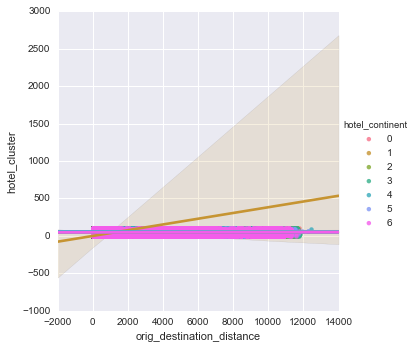

In [41]:
sns.lmplot(data=train_n_nodate, x='orig_destination_distance', y='hotel_cluster', hue='hotel_continent')
plt.show()

In [43]:
clf.oob_score_

0.12330114046013366

In [ ]:
#todo: may try multi-variant regression?